# Imports

In [ ]:
import pyxdf
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to the path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("utils"), '..')))
from utils import *

# Plot onset + offset of LSL loss + offset of data collection for all PTs

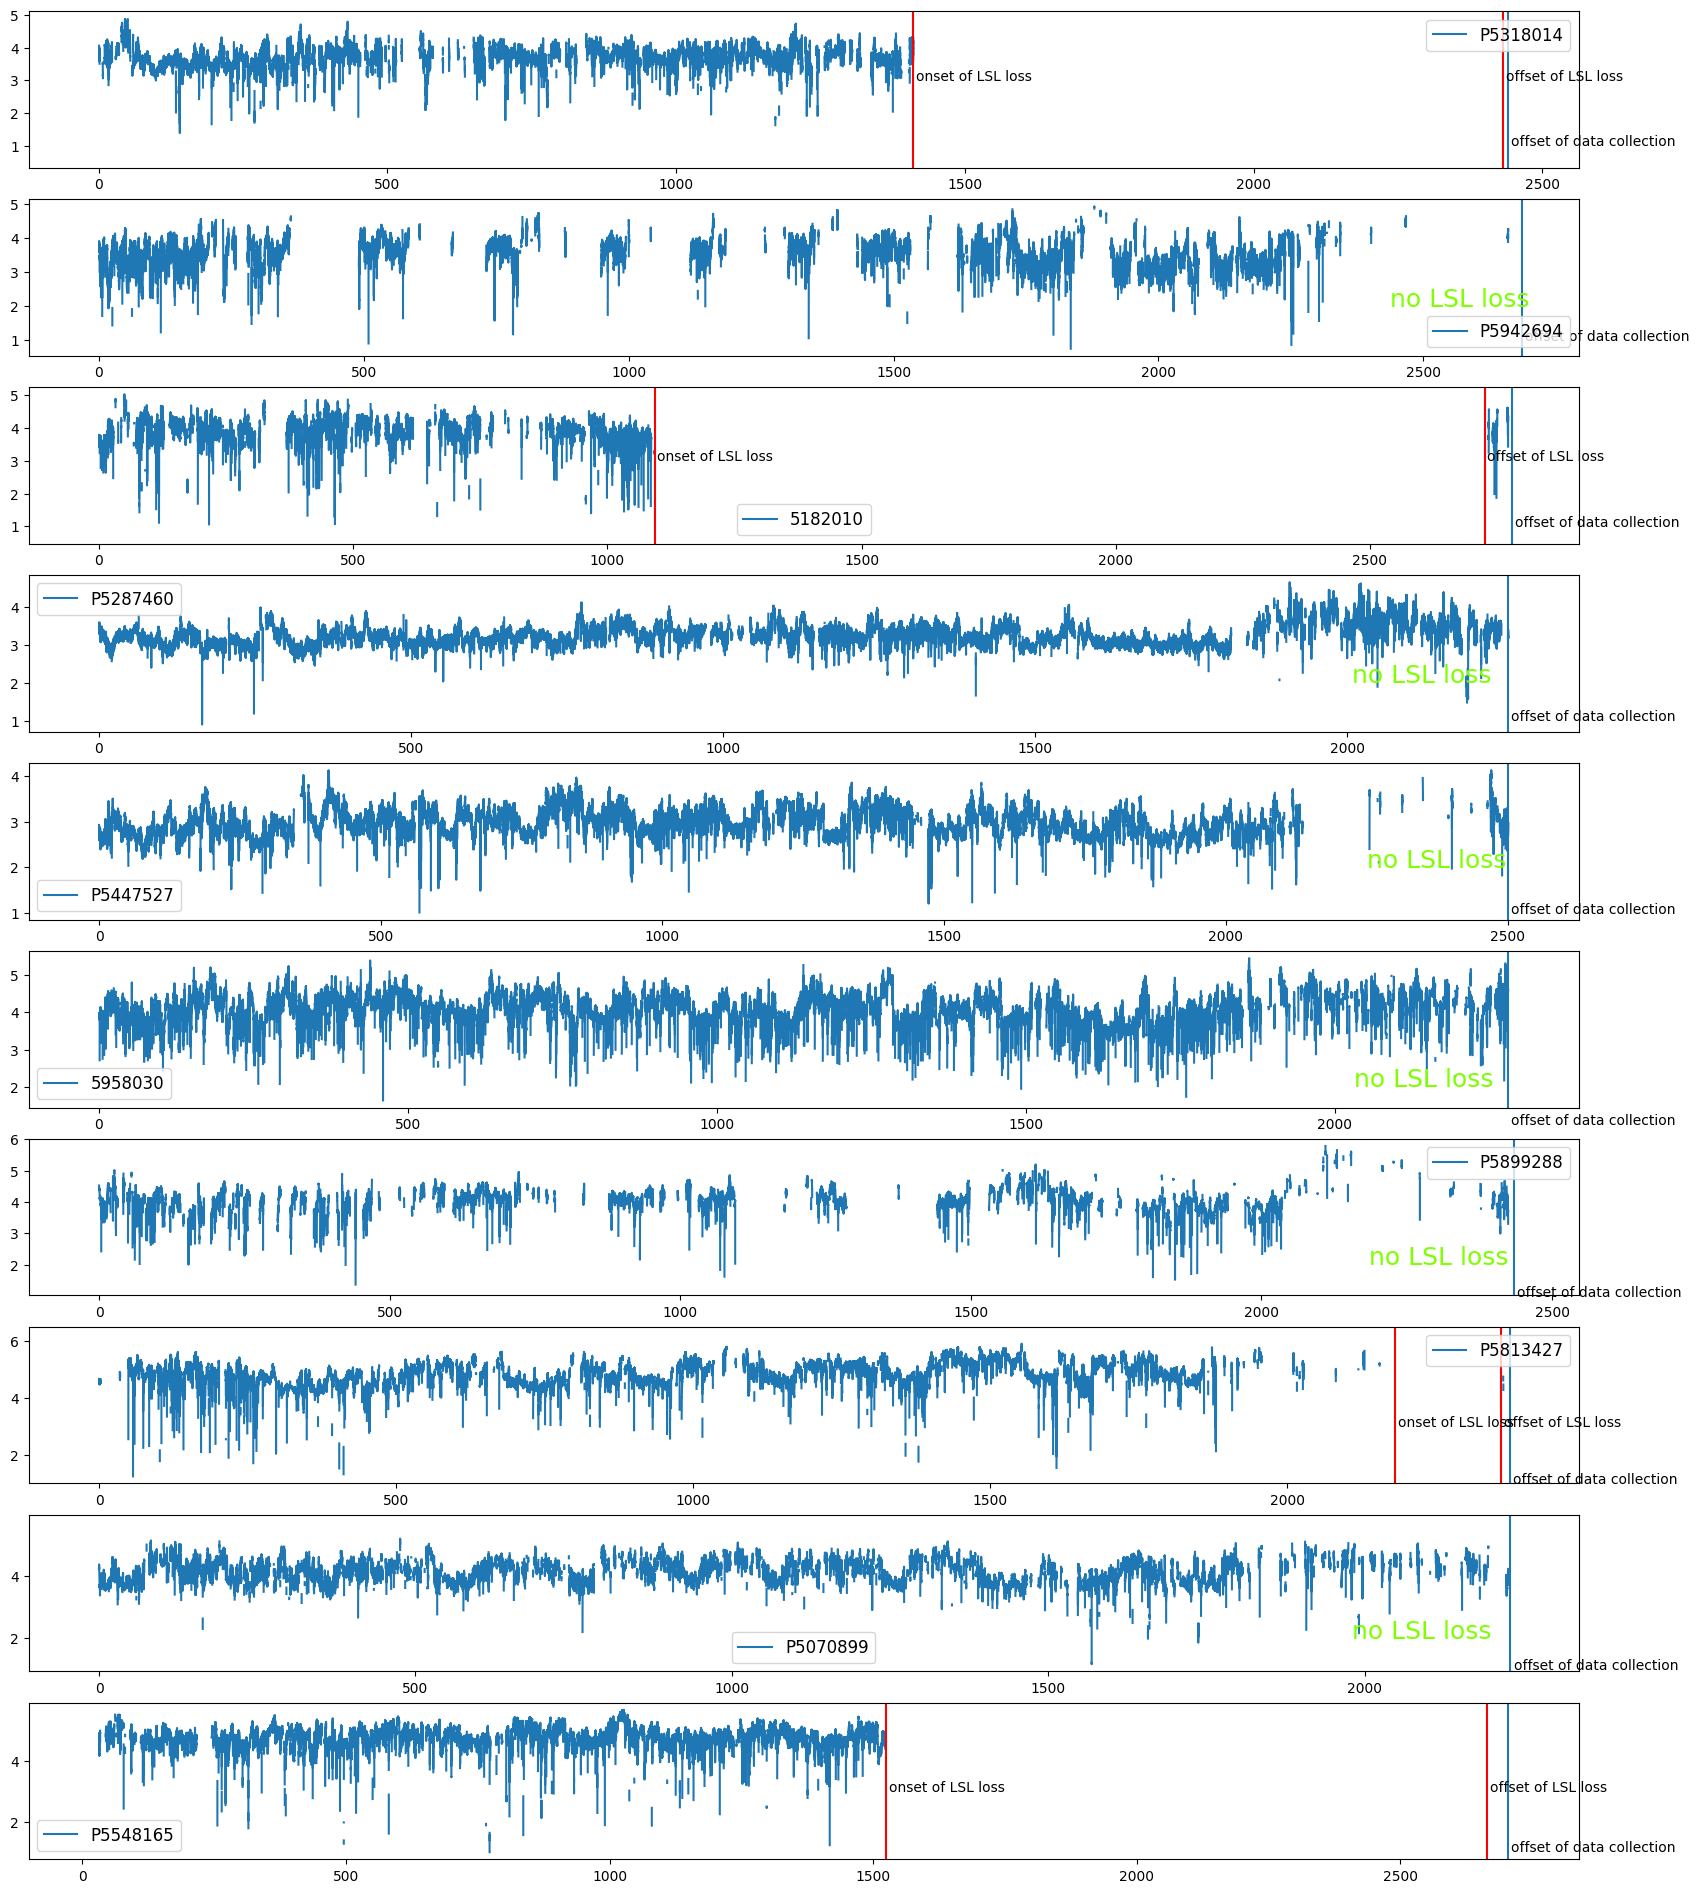

In [30]:
sub_files = glob('/Users/camilla.strauss/Desktop/CUNY_Data/Data/*/*.xdf')
fig, ax = plt.subplots(figsize=(20,24), nrows=len(sub_files), ncols=1)
sub_names = {}

for i in range(len(sub_files)):
    sub_names[i] = sub_files[i].split('/')[6].split('-')[1]

    # load in data
    xdf_path = sub_files[i]
    et_df = import_et_data(xdf_path)
    et_df['diff'] = et_df['lsl_time_stamp'].diff()
     
    srate = 1/et_df.lsl_time_stamp.diff().median()
    index = np.where(et_df['diff'] > (1/srate + 1e-2))[0]

    ax[i].plot(et_df['time'], et_df['right_pupil_diameter'], label = sub_names[i])
    ax[i].axvline(et_df['time'].values[-1])
    ax[i].text(et_df['time'].values[-1]+5, 1, 'offset of data collection')

    if len(index) == 0:
        ax[i].text(et_df.iloc[-30000]['time'], 2, 'no LSL loss', color = 'chartreuse', fontsize = 18)
    else:
        ax[i].axvline(et_df['time'][index[0]-1], color = 'r')
        ax[i].text(et_df['time'][index[0]-1]+5, 3, 'onset of LSL loss')
        ax[i].axvline(et_df['time'][index[0]], color = 'r')
        ax[i].text(et_df['time'][index[0]]+5, 3, 'offset of LSL loss')


    ax[i].legend(fontsize = 'large')

# plot LSL loss,onset + offset of experiment parts

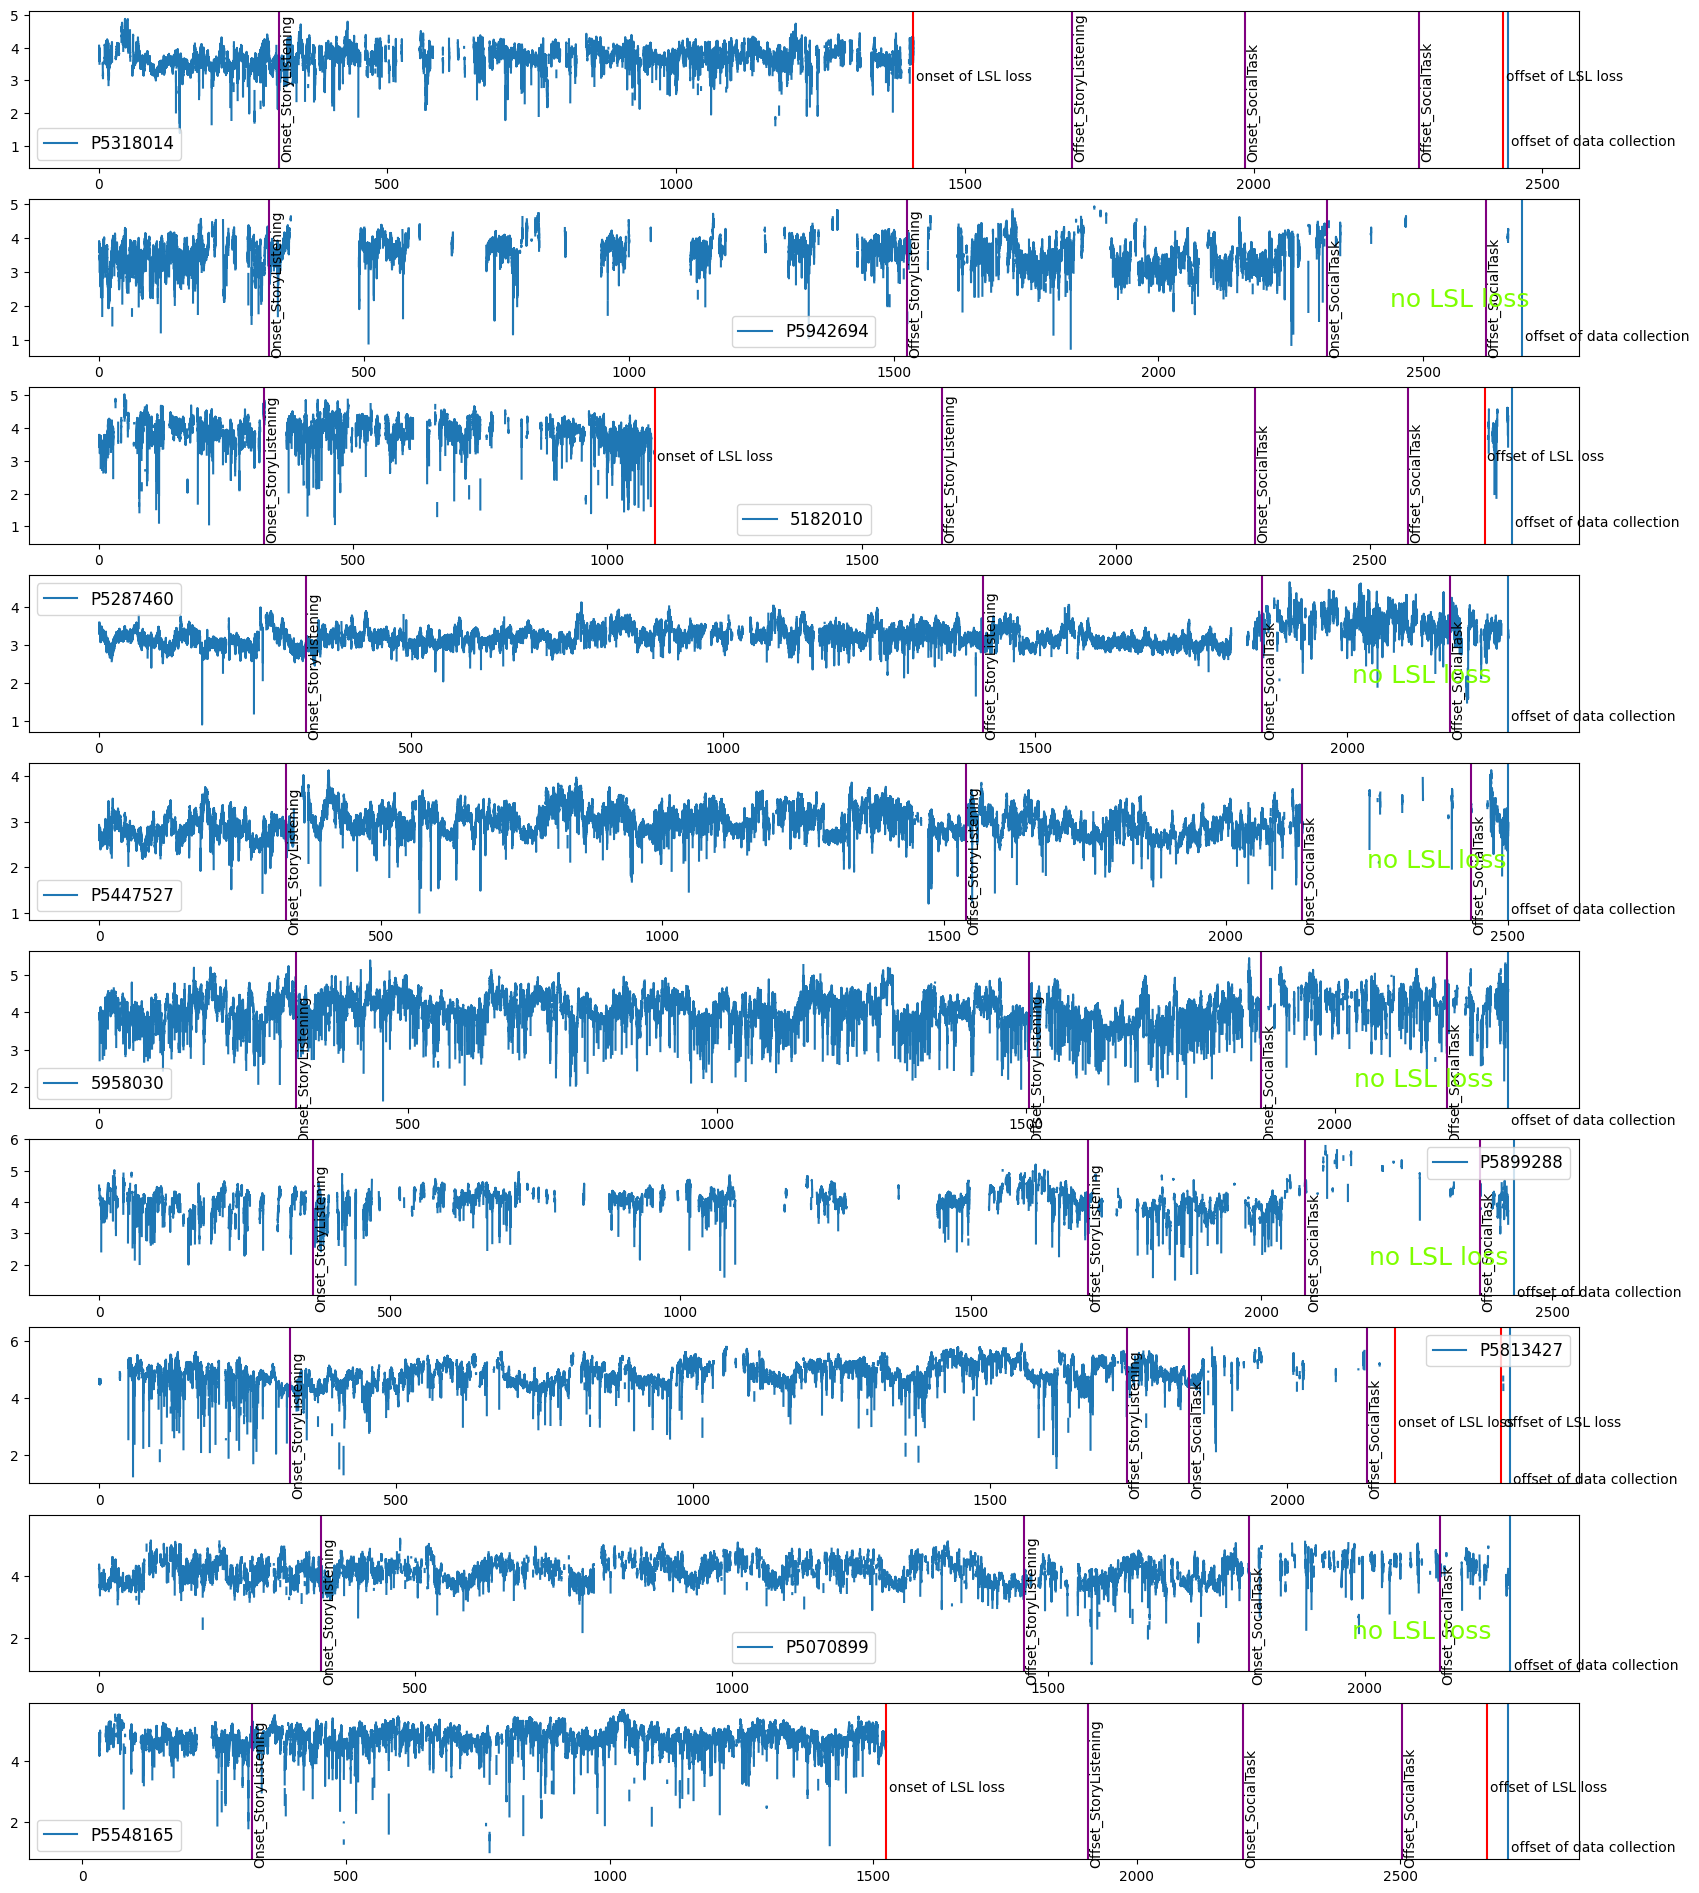

In [32]:
fig, ax = plt.subplots(figsize=(20,24), nrows=len(sub_files), ncols=1)
sub_names = {}

for i in range(len(sub_files)):
    sub_names[i] = sub_files[i].split('/')[6].split('-')[1]

    # load in data
    xdf_path = sub_files[i]
    et_df = import_et_data(xdf_path)
    et_df['diff'] = et_df['lsl_time_stamp'].diff()
    srate = 1/et_df.lsl_time_stamp.diff().median()

    # stim
    stim_df = import_stim_data(xdf_path)
    stim_df['diff'] = stim_df['lsl_time_stamp'].diff()

    # index where et_df 
    index = np.where(et_df['diff'] > (1/srate + 1e-2))[0]

    ax[i].plot(et_df['time'], et_df['right_pupil_diameter'], label = sub_names[i])
    ax[i].axvline(et_df['time'].values[-1])
    ax[i].text(et_df['time'].values[-1]+5, 1, 'offset of data collection')
    
    for event in stim_df.loc[stim_df.event.str.contains('StoryListening|SocialTask')].iterrows():
        ax[i].axvline(event[1]['time'], color='purple') # timestamp
        ax[i].text(event[1]['time']+2, .6, event[1]['event'], rotation=90)

    if len(index) == 0:
        ax[i].text(et_df.iloc[-30000]['time'], 2, 'no LSL loss', color = 'chartreuse', fontsize = 18)
    else:
        ax[i].axvline(et_df['time'][index[0]-1], color = 'r')
        ax[i].text(et_df['time'][index[0]-1]+5, 3, 'onset of LSL loss')
        ax[i].axvline(et_df['time'][index[0]], color = 'r')
        ax[i].text(et_df['time'][index[0]]+5, 3, 'offset of LSL loss')


    ax[i].legend(fontsize = 'large')